In [1]:
library(Seurat)
library(CellChat)
library(tidyverse)
library(readxl)
library(patchwork)

Attaching SeuratObject

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() 

In [2]:
packageVersion('CellChat')

[1] ‘1.6.1’

In [2]:
# setwd("/data/work/02.result/others/ST_NC/02.result/04.cellchat/online/")
# obj <- readRDS("../../02.hmy/anno_0814.rds")
# obj

# meta <- read.csv('../../meta_anno_0818.csv', row.names = 1)

# obj@meta.data <- meta
# head(meta,3)

An object of class Seurat 
46068 features across 240713 samples within 1 assay 
Active assay: RNA (46068 features, 3000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,rawname,sample,Grade,Time_category,Time,gender,patient,RNA_snn_res.0.8,seurat_clusters,Sample,RNA_snn_res.0.5,celltype_0814,celltype_0818
,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>
Normal_1_CELL1_N5,Normal_1,2418,1041,7.775021,YN-2-Skin-Normal-Normal,Normal_1,Normal,Normal,Normal,Male,patient_1,8,8,Normal_1,17,KC_Spinosum,KC_Spinosum
Normal_1_CELL2_N3,Normal_1,5267,1606,5.373078,YN-2-Skin-Normal-Normal,Normal_1,Normal,Normal,Normal,Male,patient_1,7,7,Normal_1,0,KC_Spinosum,KC_Spinosum
Normal_1_CELL6_N3,Normal_1,6575,2019,10.098859,YN-2-Skin-Normal-Normal,Normal_1,Normal,Normal,Normal,Male,patient_1,0,0,Normal_1,0,KC_Spinosum,KC_Basal


In [3]:
# genes.to.remove <- c("H2-BI", "H2-Ea-ps")
# obj <- obj[!(rownames(obj) %in% genes.to.remove), ]
# obj

An object of class Seurat 
46068 features across 240713 samples within 1 assay 
Active assay: RNA (46068 features, 3000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [6]:
# set.seed(42)  # 为了结果可重复
# obj_sub <- subset(obj, cells = sample(Cells(obj), 50000))
# saveRDS(obj_sub, "5w_cellchat.rds")

In [2]:
obj_sub <- readRDS("/data/work/02.result/others/ST_NC/02.result/04.cellchat/online/5w_cellchat.rds")
obj_sub

An object of class Seurat 
46068 features across 50000 samples within 1 assay 
Active assay: RNA (46068 features, 3000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

[1] "Create a CellChat object from a data matrix"
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Endothelial Cell Fibroblast KC_Basal KC_Granulosum KC_Spinosum Lymphocyte Macrophage Melanocyte Neurocyte SAC 


[1] "Endothelial Cell" "Fibroblast"       "KC_Basal"         "KC_Granulosum"   
 [5] "KC_Spinosum"      "Lymphocyte"       "Macrophage"       "Melanocyte"      
 [9] "Neurocyte"        "SAC"


Endothelial Cell       Fibroblast         KC_Basal    KC_Granulosum 
            3026             6186            25778             1196 
     KC_Spinosum       Lymphocyte       Macrophage       Melanocyte 
            8390             1859             1992              372 
       Neurocyte              SAC 
              99             1102 

Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”
Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by intege

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-08-19 22:05:36]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-08-19 22:45:20]"
[1] "已计算computeCommunProb & computeCommunProbPathway"
[1] "cellchat_plot.rds 已保存"
[1] "脚本运行时间：43.1740857044856\n"


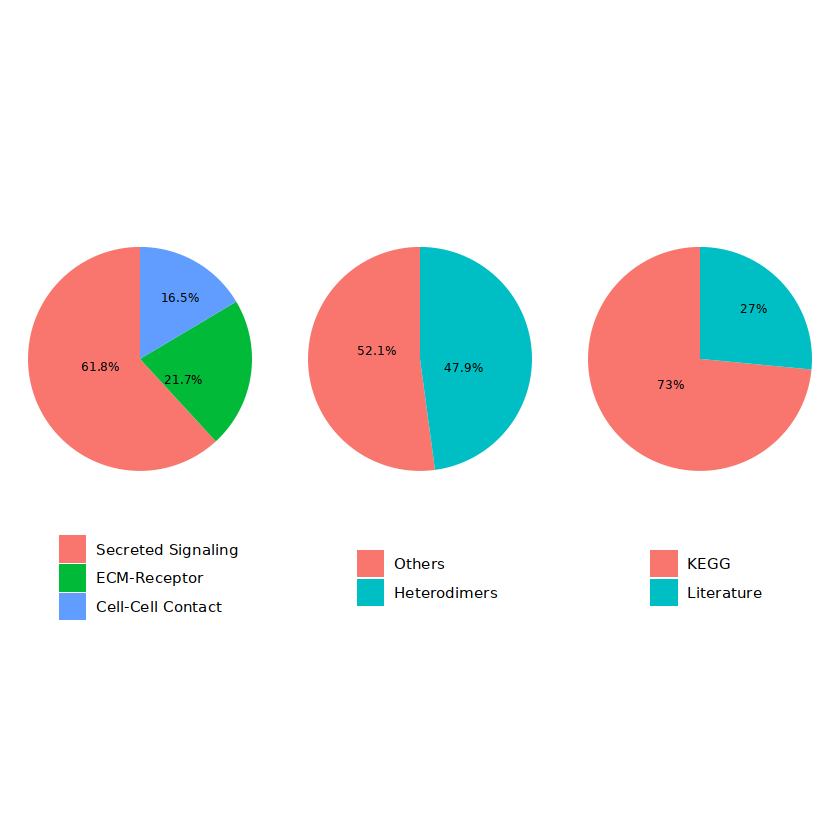

In [3]:
# 记录开始时间
start_time <- Sys.time()


# 创建 CellChat 对象
options(future.globals.maxSize = 20 * 1024^4)
cellchat <- createCellChat(object = obj_sub@assays$RNA@data,
                           meta = obj_sub@meta.data,
                           group.by = "celltype_0818")

cellchat <- setIdent(cellchat, ident.use = 'celltype_0818') #将label设置为显示的默认顺序
levels(cellchat@idents) #查看celltype和factor顺序
table(cellchat@idents) #每个celltype中的细胞数

#设置配受体数据库(CellChatDB):
CellChatDB <- CellChatDB.human #有人类(CellChatDB.human)和小鼠(CellChatDB.mouse)
showDatabaseCategory(CellChatDB) #查看描述该数据库组成的饼状图
#dplyr::glimpse(CellChatDB$interaction) #查看数据库结构

CellChatDB.use <- CellChatDB #直接使用CellChatDB全库进行细胞通讯分
#CellChatDB.use <- subsetDB(CellChatDB, search = "Secreted Signaling")  #可选择Secreted Signaling、ECM-Receptor或Cell-Cell Contact
cellchat@DB <- CellChatDB.use

# 数据预处理
cellchat <- subsetData(cellchat) #必选的step,取上一步CellChatDB.use中信号基因的表达矩阵子集,赋值到cellchat@data.Signaling
future::plan('multicore', workers = 2) # do parallel

cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)

# 计算结果赋值到 cellchat@var.features：
# head(cellchat@var.features$features) #过表达信号基因名
# head(cellchat@var.features$features.info) #差异计算结果表
# cellchat <- projectData(cellchat, PPI.human) #将基因表达数据映射到PPI网络(可跳过);返回结果:cellchat@data.project

#########################——推断 cell-cell communication network——############################

# 计算细胞通讯概率

cellchat <- computeCommunProb(cellchat, raw.use = TRUE) #返回结果:cellchat@options$parameter;默认使用原始表达数据(cellchat@data.Signaling)，若想使用上一步PPI矫正数据,设置raw.use = TALSE
cellchat <- filterCommunication(cellchat, min.cells = 10) #细胞通讯过滤(设置每个亚群中进行细胞间通讯所需的最小细胞数)
cellchat <- computeCommunProbPathway(cellchat) #计算每个信号通路相关的所有配体-受体相互作用的通信结果
cellchat <- aggregateNet(cellchat) #计算细胞对间通讯的数量和概率强度
print("已计算computeCommunProb & computeCommunProbPathway")
saveRDS(cellchat,"cellchat_plot.rds")
print("cellchat_plot.rds 已保存")


df.net <- subsetCommunication(cellchat, thresh = 0.05)
write.csv(df.net, file = "subsetCommunication.csv", row.names = FALSE)
head(df.net)

end_time <- Sys.time() # 记录结束时间
runtime <- end_time - start_time # 计算运行时间
print(paste0("脚本运行时间：", runtime, "\n"))

In [51]:
head(df.net)

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,evidence
,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>
1,KC_Basal,KC_Basal,AREG,EGFR,0.003635754,0,AREG_EGFR,AREG - EGFR,EGF,Secreted Signaling,KEGG: hsa04012
2,KC_Granulosum,KC_Basal,AREG,EGFR,0.013898720,0,AREG_EGFR,AREG - EGFR,EGF,Secreted Signaling,KEGG: hsa04012
3,KC_Spinosum,KC_Basal,AREG,EGFR,0.003826583,0,AREG_EGFR,AREG - EGFR,EGF,Secreted Signaling,KEGG: hsa04012
4,Lymphocyte,KC_Basal,AREG,EGFR,0.002559636,0,AREG_EGFR,AREG - EGFR,EGF,Secreted Signaling,KEGG: hsa04012
5,Macrophage,KC_Basal,AREG,EGFR,0.010701214,0,AREG_EGFR,AREG - EGFR,EGF,Secreted Signaling,KEGG: hsa04012
6,SAC,KC_Basal,AREG,EGFR,0.002751938,0,AREG_EGFR,AREG - EGFR,EGF,Secreted Signaling,KEGG: hsa04012


In [2]:
getwd()

[1] "/data/work/02.result/others/ST_NC/01.script"

In [ ]:
#########################——CellChat 可视化——############################

groupSize <- as.numeric(table(cellchat@idents))
groupSize

pdf("1_CellChat_circle_network.pdf", width = 8, height = 8)  # 设置输出文件名和画布大小
# par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions") %>% print()
netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength") %>% print()

dev.off()

# 图1：Number of interactions
pdf("1.1_CellChat_circle_network_Number.pdf", width = 8, height = 8)
netVisual_circle(cellchat@net$count, 
                 vertex.weight = groupSize, 
                 weight.scale = TRUE, 
                 label.edge = FALSE, 
                 title.name = "Number of interactions") %>% print()
dev.off()

# 图2：Interaction weights/strength
pdf("1.2_CellChat_circle_network_weights.pdf", width = 8, height = 8)
netVisual_circle(cellchat@net$weight, 
                 vertex.weight = groupSize, 
                 weight.scale = TRUE, 
                 label.edge = FALSE, 
                 title.name = "Interaction weights/strength") %>% print()
dev.off()

# 逐个展示细胞亚群的互作信号 count——网图：
pdf("2_subcelltype_count_netVisual_circle.pdf", width = 15, height = 15) # 用于收集所有 pathway 的 LR 数据

    mat <- cellchat@net$count
    par(mfrow = c(3,3), xpd=TRUE)
    for (i in 1:nrow(mat)) {
      # i = 1
      mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
      mat2[i, ] <- mat[i, ]
      netVisual_circle(mat2, vertex.weight = groupSize, weight.scale = T, arrow.width = 0.2,
                        arrow.size = 0.1, edge.weight.max = max(mat), title.name = rownames(mat)[i])
    }

dev.off()


# 逐个展示细胞亚群的互作信号 weight——网图：
pdf("2_subcelltype_weight_netVisual_circle.pdf", width = 15, height = 15) # 用于收集所有 pathway 的 LR 数据

    mat <- cellchat@net$weight
    par(mfrow = c(3,3), xpd=TRUE)
    for (i in 1:nrow(mat)) {
      # i = 1
      mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
      mat2[i, ] <- mat[i, ]
      netVisual_circle(mat2, vertex.weight = groupSize, weight.scale = T, arrow.width = 0.2,
                        arrow.size = 0.1, edge.weight.max = max(mat), title.name = rownames(mat)[i])
    }

dev.off()


# # 逐个展示细胞亚群的互作信号强度——柱状图：
# pdf(paste0("3_every-subcelltype_barplot.pdf"))

# lapply(1:nrow(mat), function(i) {
 
#   df <- data.frame(cell_type = colnames(mat), weight = as.numeric(mat[i, ]))  # 创建数据框
#   # 使用ggplot2创建柱状图
#   p <- ggplot(df, aes(x = cell_type, y = weight, fill = cell_type)) +
#     geom_bar(stat = "identity",fill = "steelblue", width=0.3) +
#     labs(title = rownames(mat)[i], x = "subcellType", y = "Signal Strength") +
#     theme_classic() +
#     theme(axis.text.x = element_text(angle = 45, hjust = 1), axis.text = element_text(size = 8)) 
#   return(p)
# })
# dev.off()


# 逐个信号通路展示：细胞亚群的互作
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # 提前计算 centrality
dir.create("Pathway_Plots", showWarnings = FALSE) # 创建输出目录
all_LR <- list() # 用于收集所有 pathway 的 LR 数据

# 循环输出
lapply(unique(cellchat@netP$pathways), function(pathways.show){
  tryCatch({
      
    safe_name <- gsub("[^A-Za-z0-9_]", "_", pathways.show)
      
    pdf(file.path("Pathway_Plots", paste0("pathway_", safe_name, ".pdf")), width = 9, height = 9) # 用于收集所有 pathway 的 LR 数据
    par(mar = c(5,5,5,5))  

    # chord plot
    netVisual_aggregate(cellchat, signaling = pathways.show, layout = "chord") %>% print()

    # Circle plot
    netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle") %>% print()

    # heatmap
    netVisual_heatmap(cellchat, signaling = pathways.show, color.heatmap = "Reds") %>% print()
    plot.new()

    # Identify signaling role
    netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 15, height = 2.5, font.size = 10) %>% print()
    netAnalysis_contribution(cellchat, signaling = pathways.show) %>% print()

    dev.off()
      
    # --- 提取配体-受体信息
    LR_table <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = TRUE)
    if (!is.null(LR_table)) {
      LR_table$Pathway <- pathways.show  # 增加一列标记 pathway
      all_LR[[pathways.show]] <<- LR_table  # 存入全局 list
    }
      
    
  }, error = function(e){
    message("❌ Error in pathway ", pathways.show, ": ", e$message)
  })
})


# 合并所有 pathway 的 LR 表
LR_combined <- do.call(rbind, all_LR)

# 或者写成 CSV
write.csv(LR_combined, file = "All_Pathways_LR.csv", row.names = FALSE)

# 写入 Excel 文件
# write.xlsx(LR_combined, file = "Pathway_Plots/All_Pathways_LR.xlsx", overwrite = TRUE)

In [ ]:
# levels(cellchat@idents)    # show all celltype
# # [1] "Naive CD4 T"  "Memory CD4 T" "CD14+ Mono"   "B"            "CD8 T"       
# # [6] "FCGR3A+ Mono" "NK"           "DC"           "Platelet"    
# vertex.receiver = c(1,2,4,6) # define a numeric vector （淋系细胞）giving the index of the celltype as targets
# #par(mar=c(5.1,4.1,4.1,2.1))
# netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)
# # save as TIL/CXCL_hierarchy.pdf

## 0909 plot test

In [3]:
setwd('/data/work/02.result/others/ST_NC/02.result/04.cellchat/')
cellchat <- readRDS('./cellchat_plot.rds')
cellchat

An object of class CellChat created from a single dataset 
 46068 genes.
 50000 cells. 
CellChat analysis of single cell RNA-seq data! 

In [4]:
str(cellchat)

Formal class 'CellChat' [package "CellChat"] with 15 slots
  ..@ data.raw      : num[0 , 0 ] 
  ..@ data          :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:86677417] 97 119 143 144 150 163 227 324 374 390 ...
  .. .. ..@ p       : int [1:50001] 0 918 2806 5161 7597 10644 12294 13232 15647 19276 ...
  .. .. ..@ Dim     : int [1:2] 46068 50000
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : chr [1:46068] "FO538757.2" "RP11-34P13.7" "AP006222.2" "RP5-857K21.4" ...
  .. .. .. ..$ : chr [1:50000] "Normal_2_CELL29008_N1" "DPTDI_6_DSDB_19dpb__JY_CELL204_N2" "FTDI_3_AGTAAGTCCCTT_9" "DPTDI_2_DSDB_22dpb_nonhealing1__XGY_TCTGCAACGGAG_11" ...
  .. .. ..@ x       : num [1:86677417] 1.5 1.5 1.5 1.5 1.5 ...
  .. .. ..@ factors : list()
  ..@ data.signaling:Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:2592334] 57 74 99 107 150 306 308 362 483 494 ...
  .. .. ..@ p       : int [1:50001] 0 16 83 135 218 288 327 351 417

In [12]:
groupSize <- as.numeric(table(cellchat@idents))
groupSize

pdf("1_CellChat_circle_network.pdf", width = 8, height = 8)  # 设置输出文件名和画布大小
# par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions") %>% print()
netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength") %>% print()

dev.off()

# 图1：Number of interactions
pdf("1.1_CellChat_circle_network_Number.pdf", width = 8, height = 8)
netVisual_circle(cellchat@net$count, 
                 vertex.weight = groupSize, 
                 weight.scale = TRUE, 
                 label.edge = FALSE, 
                 title.name = "Number of interactions") %>% print()
dev.off()

# 图2：Interaction weights/strength
pdf("1.2_CellChat_circle_network_weights.pdf", width = 8, height = 8)
netVisual_circle(cellchat@net$weight, 
                 vertex.weight = groupSize, 
                 weight.scale = TRUE, 
                 label.edge = FALSE, 
                 title.name = "Interaction weights/strength") %>% print()
dev.off()

[1]  3026  6186 25778  1196  8390  1859  1992   372    99  1102

In [86]:
# 图1：Number of interactions
pdf("1.1_CellChat_circle_network_Number.pdf", width = 8, height = 8)
netVisual_circle(cellchat@net$count, 
                 vertex.weight = groupSize, 
                 weight.scale = TRUE, 
                 label.edge = FALSE, 
                 title.name = "Number of interactions") %>% print()
dev.off()

pdf 
  2

In [ ]:
pathways.show <- c("CXCL") 

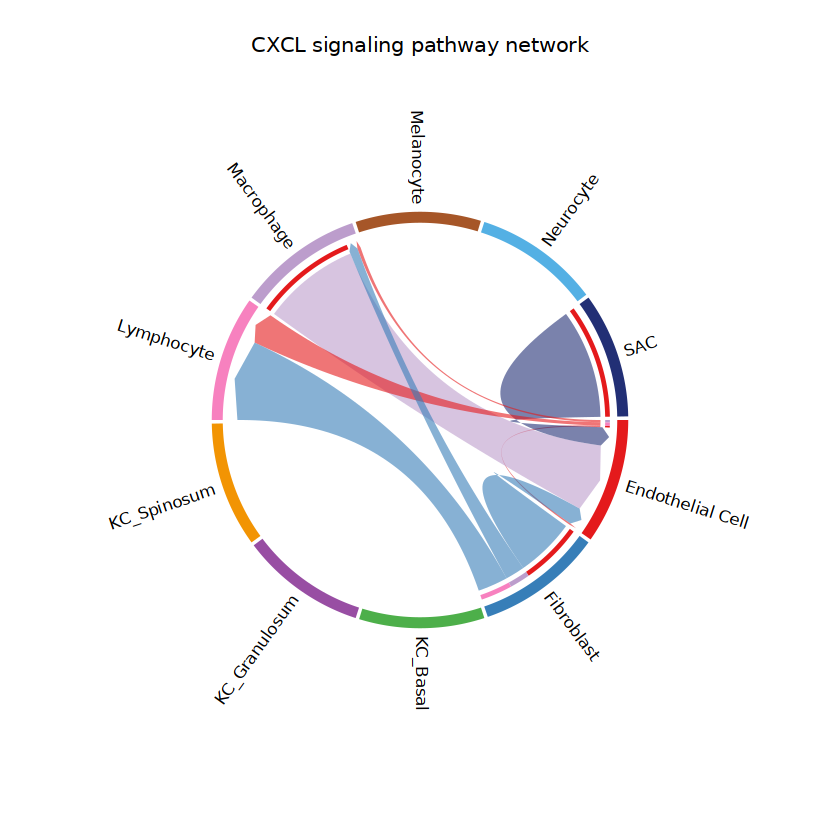

In [41]:
# chord plot
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "chord") %>% print()

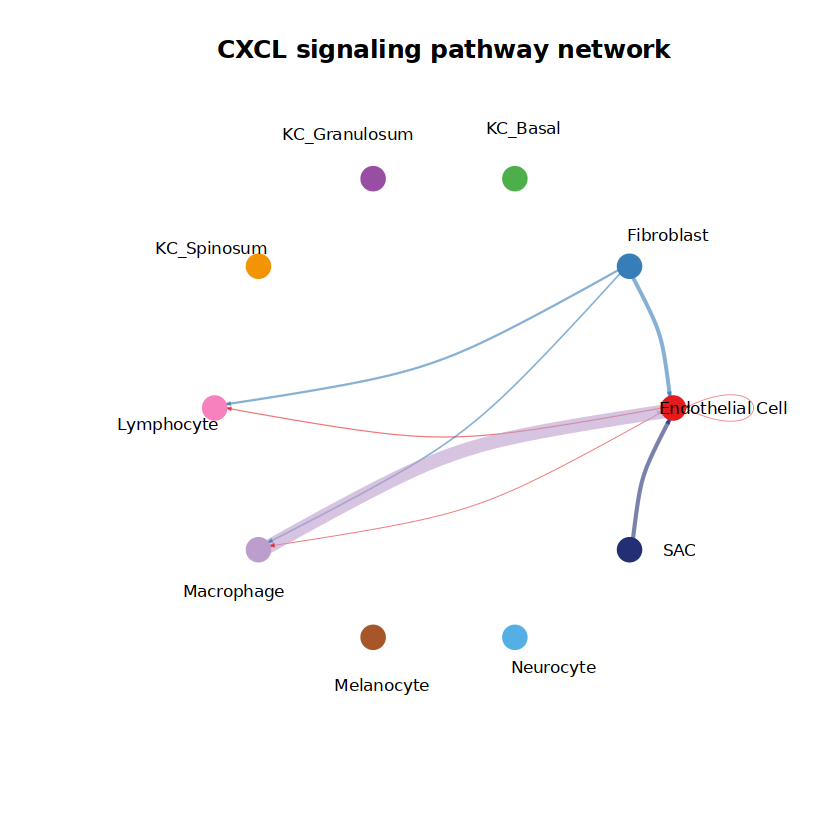

In [40]:
# Circle plot
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle") %>% print()
title(main = paste0(pathways.show, " signaling pathway network"))

In [84]:
pdf(paste0("TEST",pathways.show, ".pdf"), width = 8, height = 8)
par(mar = c(5,5,5,5))

# chord plot
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "chord") %>% print()

# Circle plot
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle") %>% print()

# heatmap
netVisual_heatmap(cellchat, signaling = pathways.show, color.heatmap = "Reds", width='20' ,height='20') %>% print()
plot.new()

# Identify signaling role
netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 15, height = 2.5, font.size = 10) %>% print()
netAnalysis_contribution(cellchat, signaling = pathways.show) %>% print()

dev.off()


Do heatmap based on a single object 




NULL


pdf 
  2

In [5]:
unique(cellchat@netP$pathways)

[1] "COLLAGEN"   "LAMININ"    "APP"        "DESMOSOME"  "FN1"       
 [6] "CD99"       "CXCL"       "MIF"        "ANNEXIN"    "MK"        
[11] "VISFATIN"   "THBS"       "SPP1"       "PECAM1"     "MHC-II"    
[16] "JAM"        "ITGB2"      "SELE"       "GALECTIN"   "CCL"       
[21] "EGF"        "CD45"       "ADGRE5"     "ANGPTL"     "PARs"      
[26] "ICAM"       "EDN"        "TENASCIN"   "THY1"       "VEGF"      
[31] "PTPRM"      "GRN"        "ESAM"       "CDH"        "CDH5"      
[36] "CALCR"      "CD46"       "NRG"        "EPHA"       "SEMA3"     
[41] "MHC-I"      "NOTCH"      "NRXN"       "FGF"        "CD34"      
[46] "MPZ"        "CEACAM"     "PERIOSTIN"  "COMPLEMENT" "PDGF"      
[51] "EPHB"       "L1CAM"      "NEGR"

In [79]:
unique(cellchat@netP$pathways)

[1] "COLLAGEN"   "LAMININ"    "APP"        "DESMOSOME"  "FN1"       
 [6] "CD99"       "CXCL"       "MIF"        "ANNEXIN"    "MK"        
[11] "VISFATIN"   "THBS"       "SPP1"       "PECAM1"     "MHC-II"    
[16] "JAM"        "ITGB2"      "SELE"       "GALECTIN"   "CCL"       
[21] "EGF"        "CD45"       "ADGRE5"     "ANGPTL"     "PARs"      
[26] "ICAM"       "EDN"        "TENASCIN"   "THY1"       "VEGF"      
[31] "PTPRM"      "GRN"        "ESAM"       "CDH"        "CDH5"      
[36] "CALCR"      "CD46"       "NRG"        "EPHA"       "SEMA3"     
[41] "MHC-I"      "NOTCH"      "NRXN"       "FGF"        "CD34"      
[46] "MPZ"        "CEACAM"     "PERIOSTIN"  "COMPLEMENT" "PDGF"      
[51] "EPHB"       "L1CAM"      "NEGR"

## 1103 plot 

In [4]:
setwd('/data/work/02.result/others/ST_NC/02.result/04.cellchat/')
cellchat <- readRDS('./cellchat_plot.rds')
cellchat

An object of class CellChat created from a single dataset 
 46068 genes.
 50000 cells. 
CellChat analysis of single cell RNA-seq data! 

In [5]:
cellchat@net$count

,Endothelial Cell,Fibroblast,KC_Basal,KC_Granulosum,KC_Spinosum,Lymphocyte,Macrophage,Melanocyte,Neurocyte,SAC
Endothelial Cell,27,34,28,19,21,14,29,13,2,31
Fibroblast,25,49,50,42,43,20,34,16,0,52
KC_Basal,6,3,8,3,5,3,6,3,2,8
KC_Granulosum,4,1,8,2,4,1,2,2,3,7
KC_Spinosum,4,2,8,3,5,2,5,4,2,8
Lymphocyte,4,5,5,4,4,2,11,2,0,5
Macrophage,20,15,17,12,13,8,30,7,2,15
Melanocyte,8,7,6,3,5,4,9,6,1,9
Neurocyte,2,5,5,4,4,2,3,3,5,7
SAC,14,8,10,6,7,4,12,6,0,14


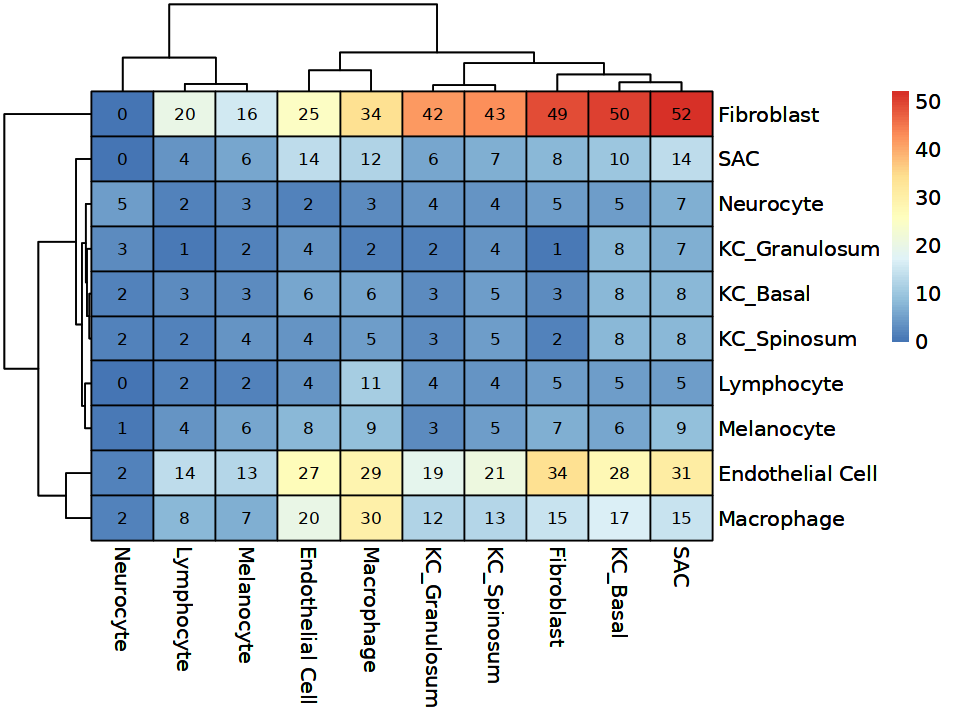

In [11]:
options(repr.plot.width=8,repr.plot.height=6)

p <- pheatmap::pheatmap(cellchat@net$count, border_color = "black", 
                   cluster_cols = T, 
                   cluster_rows = T,
                   fontsize_row=12,  # 行注释字体
                   fontsize_col=12,  # 列注释字体
                   fontsize = 12,
                   display_numbers = T,number_color="black",number_format = "%.0f")
p
ggsave('cellchat@net$count_heatmap.pdf',p,width = 8,height = 6)

In [14]:
cellchat@idents

[1] KC_Spinosum      Lymphocyte       KC_Basal         KC_Basal        
    [5] KC_Basal         KC_Basal         KC_Spinosum      KC_Basal        
    [9] Fibroblast       KC_Basal         KC_Basal         KC_Spinosum     
   [13] KC_Spinosum      KC_Basal         KC_Basal         KC_Basal        
   [17] KC_Basal         Fibroblast       Fibroblast       KC_Basal        
   [21] KC_Basal         KC_Basal         KC_Spinosum      KC_Granulosum   
   [25] KC_Basal         Fibroblast       KC_Basal         KC_Basal        
   [29] KC_Basal         Endothelial Cell KC_Spinosum      Fibroblast      
   [33] KC_Basal         KC_Basal         KC_Basal         KC_Basal        
   [37] KC_Basal         KC_Spinosum      KC_Basal         KC_Basal        
   [41] Fibroblast       KC_Basal         KC_Basal         KC_Spinosum     
   [45] KC_Spinosum      KC_Basal         KC_Basal         KC_Spinosum     
   [49] KC_Spinosum      KC_Basal         KC_Spinosum      KC_Basal        
   [53] KC_Spinosum      Endothelial Cell Endothelial Cell KC_Basal        
   [57] Endothelial Cell KC_Basal         KC_Basal         KC_Basal        
   [61] Fibroblast       KC_Basal         KC_Spinosum      KC_Basal        
   [65] KC_Basal         KC_Basal         KC_Basal         Fibroblast      
   [69] KC_Basal         KC_Basal         Melanocyte       KC_Basal        
   [73] KC_Spinosum      KC_Basal         KC_Basal         KC_Spinosum     
   [77] KC_Spinosum      Fibroblast       KC_Basal         KC_Basal        
   [81] KC_Spinosum      KC_Spinosum      Endothelial Cell KC_Basal        
   [85] SAC              KC_Basal         KC_Basal         KC_Basal        
   [89] KC_Basal         KC_Granulosum    KC_Basal         Endothelial Cell
   [93] KC_Basal         Endothelial Cell KC_Basal         KC_Basal        
   [97] KC_Basal         Lymphocyte       KC_Spinosum      KC_Basal        
  [101] KC_Spinosum      KC_Basal         KC_Basal         KC_Basal        
  [105] Fibroblast       Fibroblast       KC_Basal         KC_Basal        
  [109] Endothelial Cell Melanocyte       Lymphocyte       KC_Basal        
  [113] KC_Spinosum      Fibroblast       KC_Granulosum    KC_Basal        
  [117] KC_Basal         Endothelial Cell KC_Basal         KC_Spinosum     
  [121] KC_Basal         KC_Basal         KC_Spinosum      Macrophage      
  [125] KC_Basal         Endothelial Cell KC_Basal         KC_Basal        
  [129] KC_Spinosum      KC_Basal         KC_Granulosum    Fibroblast      
  [133] KC_Basal         KC_Basal         KC_Basal         Endothelial Cell
  [137] KC_Basal         KC_Basal         KC_Spinosum      Endothelial Cell
  [141] KC_Basal         KC_Basal         KC_Spinosum      KC_Basal        
  [145] KC_Basal         Lymphocyte       KC_Basal         KC_Basal        
  [149] Endothelial Cell KC_Basal         KC_Basal         KC_Basal        
  [153] KC_Basal         Fibroblast       KC_Basal         Lymphocyte      
  [157] Macrophage       KC_Spinosum      Lymphocyte       Fibroblast      
  [161] KC_Basal         KC_Basal         Fibroblast       KC_Basal        
  [165] KC_Basal         KC_Basal         KC_Basal         KC_Spinosum     
  [169] KC_Basal         KC_Basal         KC_Basal         Fibroblast      
  [173] KC_Spinosum      KC_Basal         KC_Basal         Lymphocyte      
  [177] KC_Spinosum      KC_Basal         KC_Basal         KC_Basal        
  [181] Fibroblast       KC_Basal         KC_Basal         Fibroblast      
  [185] KC_Basal         KC_Basal         KC_Basal         Fibroblast      
  [189] KC_Basal         KC_Spinosum      KC_Basal         Fibroblast      
  [193] Endothelial Cell Endothelial Cell KC_Basal         Fibroblast      
  [197] KC_Basal         KC_Basal         KC_Basal         Fibroblast      
  [201] KC_Spinosum      Fibroblast       KC_Spinosum      KC_Basal        
  [205] KC_Basal         KC_Basal         KC_Basal         KC_Basal        
  [209] KC_Basal         KC_Basal         KC_Spinosu

In [26]:
unique(cellchat@netP$pathways)

levels(cellchat@idents) 

[1] "COLLAGEN"   "LAMININ"    "APP"        "DESMOSOME"  "FN1"       
 [6] "CD99"       "CXCL"       "MIF"        "ANNEXIN"    "MK"        
[11] "VISFATIN"   "THBS"       "SPP1"       "PECAM1"     "MHC-II"    
[16] "JAM"        "ITGB2"      "SELE"       "GALECTIN"   "CCL"       
[21] "EGF"        "CD45"       "ADGRE5"     "ANGPTL"     "PARs"      
[26] "ICAM"       "EDN"        "TENASCIN"   "THY1"       "VEGF"      
[31] "PTPRM"      "GRN"        "ESAM"       "CDH"        "CDH5"      
[36] "CALCR"      "CD46"       "NRG"        "EPHA"       "SEMA3"     
[41] "MHC-I"      "NOTCH"      "NRXN"       "FGF"        "CD34"      
[46] "MPZ"        "CEACAM"     "PERIOSTIN"  "COMPLEMENT" "PDGF"      
[51] "EPHB"       "L1CAM"      "NEGR"

[1] "Endothelial Cell" "Fibroblast"       "KC_Basal"         "KC_Granulosum"   
 [5] "KC_Spinosum"      "Lymphocyte"       "Macrophage"       "Melanocyte"      
 [9] "Neurocyte"        "SAC"

In [16]:
unique_cells <- unique(cellchat@idents)
num_cells <- length(unique_cells)
vertex.receiver = seq(1:num_cells)
vertex.receiver

[1]  1  2  3  4  5  6  7  8  9 10

In [54]:
# # 这里的数字为注释水平的顺序，从2开始，比如 5表示 "Fibroblast" 
# levels(cellchat@idents) # show factor levels of the cell labels
# 'Endothelial Cell''Fibroblast''KC_Basal''KC_Granulosum''KC_Spinosum''Lymphocyte''Macrophage''Melanocyte''Neurocyte''SAC'

# netVisual_bubble(cellchat, sources.use = 5, targets.use = c(1,2,3,4,6,7,8), remove.isolate = FALSE)


pathways.show <- c("COLLAGEN")

pdf(paste0("TEST_",pathways.show, ".pdf"), width = 8, height = 8)

  # 绘制气泡图，保持与函数约定一致

  netVisual_bubble(cellchat, signaling = pathways.show, sources.use = 2,targets.use = c(3,4,5,6,7))


dev.off()


Comparing communications on a single object 




pdf 
  2

In [ ]:


# 逐个信号通路展示：细胞亚群的互作
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # 提前计算 centrality
dir.create("Pathway_Plots_1103", showWarnings = FALSE) # 创建输出目录
all_LR <- list() # 用于收集所有 pathway 的 LR 数据

# 循环输出
lapply(unique(cellchat@netP$pathways), function(pathways.show){
  tryCatch({
      
    safe_name <- gsub("[^A-Za-z0-9_]", "_", pathways.show)
      
    pdf(file.path("Pathway_Plots_1103", paste0("pathway_", safe_name, ".pdf")), width = 9, height = 9) # 用于收集所有 pathway 的 LR 数据
    par(mar = c(5,5,5,5))  

    # chord plot
    netVisual_aggregate(cellchat, signaling = pathways.show, layout = "chord") %>% print()

    # Circle plot
    netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle") %>% print()

    # heatmap
    netVisual_heatmap(cellchat, signaling = pathways.show, color.heatmap = "Reds") %>% print()
    plot.new()

    # Identify signaling role
    netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 15, height = 2.5, font.size = 10) %>% print()
    netAnalysis_contribution(cellchat, signaling = pathways.show) %>% print()
      
    # 绘制气泡图，保持与函数约定一致
    netVisual_bubble(cellchat, signaling = pathways.show) %>% print()

    dev.off()
      
    # --- 提取配体-受体信息
    LR_table <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = TRUE)
    if (!is.null(LR_table)) {
      LR_table$Pathway <- pathways.show  # 增加一列标记 pathway
      all_LR[[pathways.show]] <<- LR_table  # 存入全局 list
    }
      
    
  }, error = function(e){
    message("❌ Error in pathway ", pathways.show, ": ", e$message)
  })
})


# 合并所有 pathway 的 LR 表
LR_combined <- do.call(rbind, all_LR)

# 或者写成 CSV
write.csv(LR_combined, file = "Pathway_Plots_1103/All_Pathways_LR_1103.csv", row.names = FALSE)

# 写入 Excel 文件
library(openxlsx)
write.xlsx(LR_combined, file = "Pathway_Plots_1103/All_Pathways_LR_1103.xlsx", overwrite = TRUE)

In [49]:
# install.packages("openxlsx")
# library(openxlsx)

# # 使用 openxlsx 写入
# write.xlsx(LR_combined, file = "Pathway_Plots_1103/All_Pathways_LR_1103.xlsx")

Updating HTML index of packages in '.Library'



In [42]:
LR_combined

pairLR       geneLR       Pathway   
COLLAGEN   c("COL1A.... COL1A1, ....   COLLAGEN
LAMININ    c("LAMA2.... LAMA2, L....    LAMININ
APP            APP_CD74    APP, CD74        APP
DESMOSOME  c("DSC1_.... DSC1, DS....  DESMOSOME
FN1        c("FN1_I.... FN1, CD4....        FN1
CD99       c("CD99_.... CD99, PI....       CD99
CXCL       c("CXCL1.... CXCL1, C....       CXCL
MIF        c("MIF_C.... MIF, CD7....        MIF
ANNEXIN      ANXA1_FPR1  ANXA1, FPR1    ANNEXIN
MK         c("MDK_S.... MDK, SDC....         MK
VISFATIN   c("NAMPT.... NAMPT, I....   VISFATIN
THBS       c("THBS1.... THBS1, T....       THBS
SPP1       c("SPP1_.... SPP1, CD....       SPP1
PECAM1     PECAM1_P.... PECAM1, ....     PECAM1
MHC-II     c("HLA-D.... HLA-DPA1....     MHC-II
JAM        c("JAM2_.... JAM2, F1....        JAM
ITGB2      c("ITGB2.... ITGB2, I....      ITGB2
SELE       c("SELE_.... SELE, CD....       SELE
GALECTIN   c("LGALS.... LGALS9, ....   GALECTIN
CCL        c("CCL3_.... CCL3, CC....        CCL
EGF        c("AREG_.... AREG, HB....        EGF
CD45         PTPRC_MRC1  PTPRC, MRC1       CD45
ADGRE5      ADGRE5_CD55 ADGRE5, CD55     ADGRE5
ANGPTL     c("ANGPT.... ANGPTL2,....     ANGPTL
PARs       c("PRSS3.... PRSS3, F....       PARs
ICAM       ICAM1_IT.... ICAM1, I....       ICAM
EDN        c("EDN1_.... EDN1, ED....        EDN
TENASCIN   c("TNC_S.... TNC, SDC....   TENASCIN
THY1       THY1_ITG.... THY1, IT....       THY1
VEGF       c("VEGFA.... VEGFA, V....       VEGF
PTPRM       PTPRM_PTPRM PTPRM, PTPRM      PTPRM
GRN           GRN_SORT1   GRN, SORT1        GRN
ESAM          ESAM_ESAM   ESAM, ESAM       ESAM
CDH           CDH1_CDH1   CDH1, CDH1        CDH
CDH5          CDH5_CDH5   CDH5, CDH5       CDH5
CALCR        ADM_CALCRL  ADM, CALCRL      CALCR
CD46          CD46_JAG1   CD46, JAG1       CD46
NRG        c("NRG1_.... NRG1, NR....        NRG
EPHA       c("EFNA1.... EFNA1, E....       EPHA
SEMA3      SEMA3C_P.... SEMA3C, ....      SEMA3
MHC-I      HLA-F_LILRB1 HLA-F, L....      MHC-I
NOTCH      c("JAG1_.... JAG1, JA....      NOTCH
NRXN       c("NRXN1.... NRXN1, N....       NRXN
FGF          FGF7_FGFR1  FGF7, FGFR1        FGF
CD34          CD34_SELP   CD34, SELP       CD34
MPZ         MPZL1_MPZL1 MPZL1, MPZL1        MPZ
CEACAM     c("CEACA.... CEACAM1,....     CEACAM
PERIOSTIN  POSTN_IT.... POSTN, I....  PERIOSTIN
COMPLEMENT c("C3_C3.... C3, C3AR.... COMPLEMENT
PDGF       c("PDGFB.... PDGFB, P....       PDGF
EPHB        EFNB2_EPHB4 EFNB2, EPHB4       EPHB
L1CAM       L1CAM_L1CAM L1CAM, L1CAM      L1CAM
NEGR        NEGR1_NEGR1 NEGR1, NEGR1       NEGR